<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [124]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [126]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [127]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols

target_col = 'Churn'
num_cols_target = num_cols + ['Churn']
cat_cols_target = cat_cols + ['Churn']

In [128]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

### Comment 
Подозрительная колонка TotalSpent, которая имеет тип object, хотя там должны быть численные значения 

In [130]:
### После анализа датасета нашлись объекты с TotalSpent = ' '

In [131]:
data['TotalSpent'].value_counts()

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

In [132]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [133]:
data[data['TotalSpent'] == ' '].shape

(9, 20)

In [134]:
# Преобразуем Total Spent из object в float, заменив пропуски на нули
data['TotalSpent'] = data['TotalSpent'].replace(to_replace=' ', value=0).astype(float)
test['TotalSpent'] = test['TotalSpent'].replace(to_replace=' ', value=0).astype(float)

In [135]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

### Comment
> Пропущенные значения были в Total Spent. Были заменены на нули как в тесте, так и в треине

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [136]:
import seaborn as sns

### Численные данные

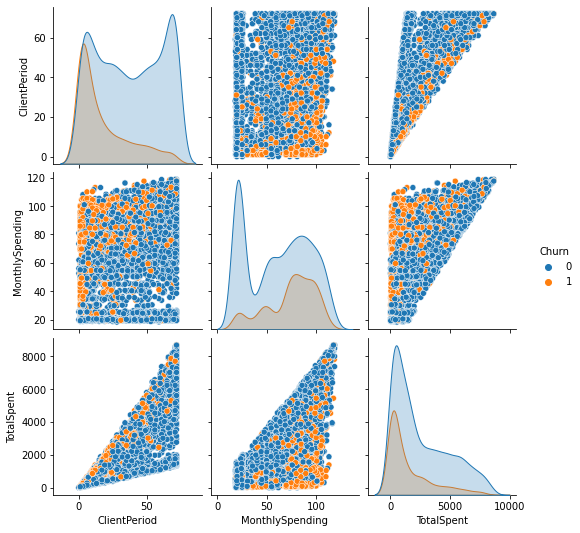

In [137]:
sns.pairplot(data=data[num_cols_target], hue=target_col)

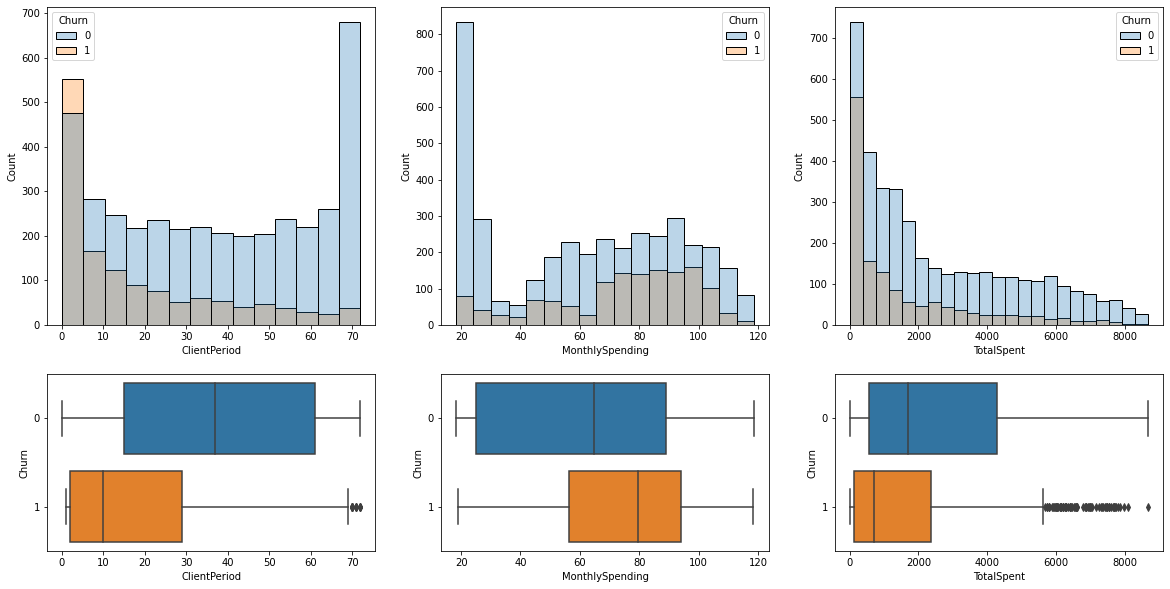

In [138]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10), gridspec_kw={"height_ratios": (.9, .5)})

for i, num_feat in enumerate(num_cols):
    sns.histplot(data=data[num_cols_target], x=num_feat, hue=target_col, ax=ax[0,i], alpha=0.3)
    sns.boxplot(data=data[num_cols_target], x=num_feat, y=target_col, ax=ax[1, i], orient='h')

### Comments
> Client Period: пользователи у которые только начали пользоваться (0-3 месяцы) более склонны к тому, чтобы уйти
<br>
> Client Period: напротив, пользователи, которые уже долго пользуются услугами, чаще всего не склонны уйходить
<br>
> Monthly Spending: пользователи которые мало платят не склонны уходить и напротив, чем больше платят, тем более склонны к уходы

In [139]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ClientPeriod,5282.0,32.397009,24.550326,0.00,9.0000,29.00,55.0000,72.00
MonthlySpending,5282.0,64.924754,30.176464,18.25,35.4625,70.40,90.0500,118.75
TotalSpent,5282.0,2287.486161,2269.049195,0.00,395.7250,1405.65,3795.2125,8684.80


### Категориальные данные

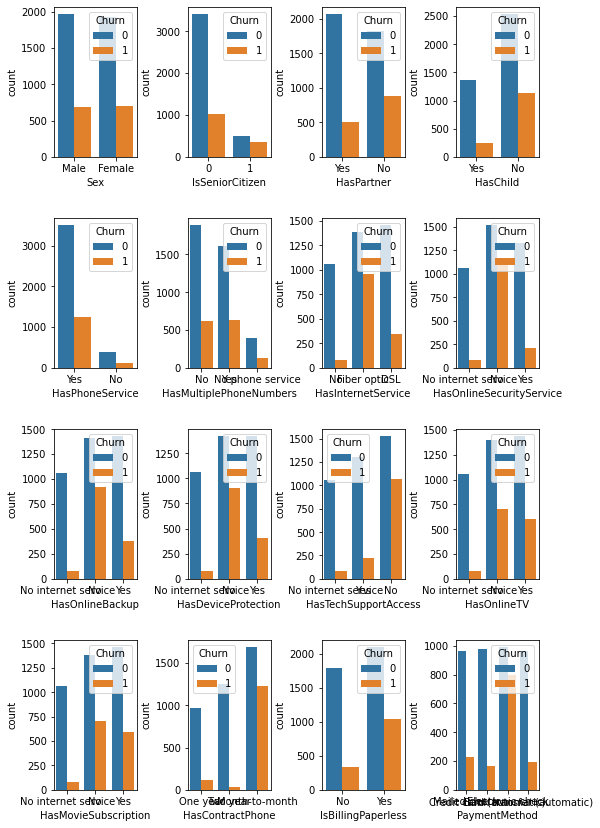

In [140]:
fig, ax = plt.subplots(4, 4, figsize=(8, 12))
fig.tight_layout(h_pad=4, w_pad=2, pad=3)
row, col = 0, 0
for i, feat in enumerate(cat_cols):
    sns.countplot(x=feat, data=data, ax=ax[row, col], hue='Churn')
#     ax[row, col].pie(data[feat].value_counts())
    col += 1
    if col == 4:
        row += 1
        col = 0

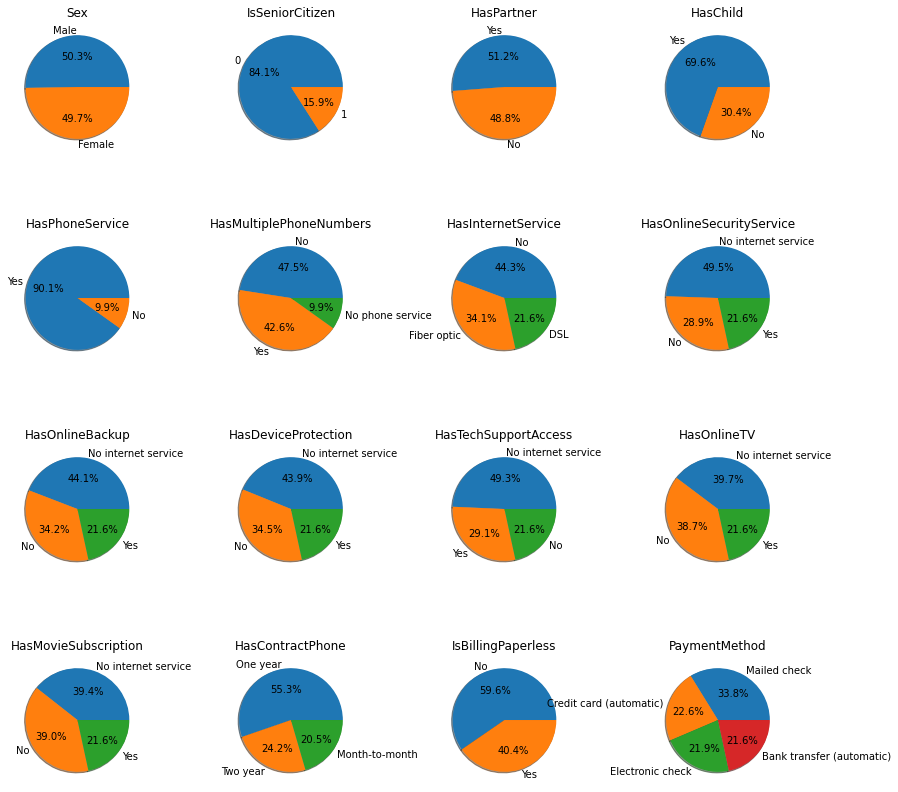

In [141]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(h_pad=4, w_pad=5, pad=3)
row, col = 0, 0
for i, feat in enumerate(cat_cols):
#     sns.countplot(x=feat, data=data, ax=ax[row, col])
    ax[row, col].pie(data[feat].value_counts(), labels=data[feat].unique(), shadow = True, autopct='%1.1f%%')
    ax[row, col].set_title(feat)
    col += 1
    if col == 4:
        row += 1
        col = 0

0    0.737978
1    0.262022
Name: Churn, dtype: float64

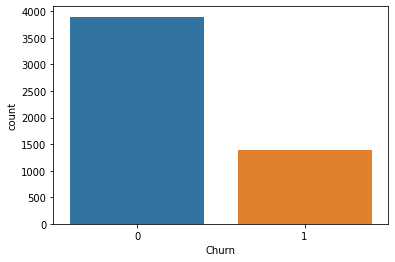

In [142]:
# Баланс классов
sns.countplot(x=data[target_col]);
data[target_col].value_counts(normalize=True)

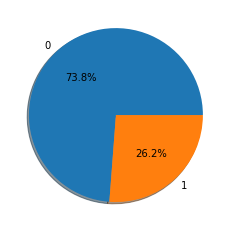

In [143]:
plt.pie(data[target_col].value_counts(), labels=data[target_col].unique(), shadow = True, autopct='%1.1f%%');

### Comment
> Да, классы не сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### Comment
> По boxplot видно, что есть пару аутлаеров в клиентах, которые ушли: объекты которые часто пользовались сервисом, но потом все ровно ушли

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [144]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

In [145]:
# make test like train
missing_cols = set(data[cat_cols]) - set(test[cat_cols])
for c in missing_cols:
    test[c] = 0
test = test[data[feature_cols].columns]

In [146]:
data_cat_onehot = pd.get_dummies(data[cat_cols])
test_cat_onehot = pd.get_dummies(test[cat_cols])

train = pd.concat([data[num_cols], data_cat_onehot], axis=1)
test = pd.concat([test[num_cols], test_cat_onehot], axis=1)

In [164]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='liblinear'))
])

params = {
    'logit__penalty': ['l1', 'l2'],
    'logit__C': [0.001, 0.01, 0.1] + list(np.geomspace(1, 1000, 50)),
    'logit__class_weight': [None, 'balanced']
    
}
grid = GridSearchCV(pipeline, params, scoring='roc_auc', cv=5, n_jobs=-1, refit=True)
grid.fit(train, data[target_col])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logit',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logit__C': [0.001, 0.01, 0.1, 1.0, 1.1513953993264474,
                                      1.3257113655901092, 1.5264179671752334,
                                      1.7575106248547918, 2.023589647725157,
                                      2.329951810515372, 2.6826957952797255,
                                      3.088843596477481, 3.5564803062231287,
                                      4.0949...
                                      5.428675439323859, 6.250551925273973,
                                      7.196856730011519, 8.286427728546844,
                                      9.54095476349994, 10.985411419875584,
                                      12.648552168552959, 14.563484775012437,
            

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [243]:
print('best score: %f' % grid.best_score_)
print('best params: %s' % grid.best_params_)
grid_logit = grid.best_estimator_

best score: 0.845149
best params: {'logit__C': 104.81131341546852, 'logit__class_weight': None, 'logit__penalty': 'l1'}


### make submisstion by logreg

In [244]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = grid.best_estimator_.predict_proba(test)[:, 1]
submission.to_csv('./logreg_tuned.csv', index=False)

In [59]:
### Kaggle result: 0.84583
### Team: Vlad_Kremenevskiy

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [178]:
from catboost import CatBoostClassifier

In [180]:
x_train, x_val, y_train, y_val = train_test_split(data[feature_cols], data[target_col], train_size=0.2)

In [188]:
%%time
catboost = CatBoostClassifier(cat_features=cat_cols)
catboost.fit(x_train[feature_cols], y_train, eval_set=(x_val, y_val), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032118
0:	learn: 0.6740894	test: 0.6751107	best: 0.6751107 (0)	total: 8.62ms	remaining: 8.61s
1:	learn: 0.6517945	test: 0.6534673	best: 0.6534673 (1)	total: 22.6ms	remaining: 11.3s
2:	learn: 0.6347277	test: 0.6359993	best: 0.6359993 (2)	total: 26.4ms	remaining: 8.78s
3:	learn: 0.6178692	test: 0.6193461	best: 0.6193461 (3)	total: 43.6ms	remaining: 10.9s
4:	learn: 0.6037575	test: 0.6049249	best: 0.6049249 (4)	total: 65ms	remaining: 12.9s
5:	learn: 0.5886141	test: 0.5904283	best: 0.5904283 (5)	total: 71.6ms	remaining: 11.9s
6:	learn: 0.5735328	test: 0.5760716	best: 0.5760716 (6)	total: 80.2ms	remaining: 11.4s
7:	learn: 0.5606281	test: 0.5636496	best: 0.5636496 (7)	total: 85.3ms	remaining: 10.6s
8:	learn: 0.5506835	test: 0.5543409	best: 0.5543409 (8)	total: 91.1ms	remaining: 10s
9:	learn: 0.5414629	test: 0.5461030	best: 0.5461030 (9)	total: 94.8ms	remaining: 9.38s
10:	learn: 0.5313210	test: 0.5364133	best: 0.5364133 (10)	total: 98.4ms	remaining: 8.84s
11:	learn: 0.52

138:	learn: 0.3509115	test: 0.4223673	best: 0.4223272 (136)	total: 576ms	remaining: 3.57s
139:	learn: 0.3505291	test: 0.4224163	best: 0.4223272 (136)	total: 582ms	remaining: 3.58s
140:	learn: 0.3501180	test: 0.4223927	best: 0.4223272 (136)	total: 589ms	remaining: 3.59s
141:	learn: 0.3500277	test: 0.4224007	best: 0.4223272 (136)	total: 596ms	remaining: 3.6s
142:	learn: 0.3495849	test: 0.4223186	best: 0.4223186 (142)	total: 599ms	remaining: 3.59s
143:	learn: 0.3492232	test: 0.4223014	best: 0.4223014 (143)	total: 604ms	remaining: 3.59s
144:	learn: 0.3489518	test: 0.4223168	best: 0.4223014 (143)	total: 608ms	remaining: 3.58s
145:	learn: 0.3489515	test: 0.4223182	best: 0.4223014 (143)	total: 609ms	remaining: 3.56s
146:	learn: 0.3487328	test: 0.4223185	best: 0.4223014 (143)	total: 613ms	remaining: 3.56s
147:	learn: 0.3481836	test: 0.4222626	best: 0.4222626 (147)	total: 618ms	remaining: 3.56s
148:	learn: 0.3478495	test: 0.4221938	best: 0.4221938 (148)	total: 622ms	remaining: 3.55s
149:	learn:

236:	learn: 0.3154725	test: 0.4232830	best: 0.4218720 (194)	total: 965ms	remaining: 3.11s
237:	learn: 0.3152680	test: 0.4233608	best: 0.4218720 (194)	total: 974ms	remaining: 3.12s
238:	learn: 0.3147865	test: 0.4234121	best: 0.4218720 (194)	total: 983ms	remaining: 3.13s
239:	learn: 0.3142706	test: 0.4234550	best: 0.4218720 (194)	total: 993ms	remaining: 3.14s
240:	learn: 0.3137728	test: 0.4233103	best: 0.4218720 (194)	total: 1000ms	remaining: 3.15s
241:	learn: 0.3131950	test: 0.4232527	best: 0.4218720 (194)	total: 1.01s	remaining: 3.16s
242:	learn: 0.3129066	test: 0.4232604	best: 0.4218720 (194)	total: 1.02s	remaining: 3.17s
243:	learn: 0.3126679	test: 0.4232889	best: 0.4218720 (194)	total: 1.02s	remaining: 3.17s
244:	learn: 0.3124963	test: 0.4233194	best: 0.4218720 (194)	total: 1.03s	remaining: 3.17s
245:	learn: 0.3124096	test: 0.4233224	best: 0.4218720 (194)	total: 1.03s	remaining: 3.17s
246:	learn: 0.3119372	test: 0.4234573	best: 0.4218720 (194)	total: 1.04s	remaining: 3.16s
247:	lear

346:	learn: 0.2768064	test: 0.4277103	best: 0.4218720 (194)	total: 1.53s	remaining: 2.88s
347:	learn: 0.2766467	test: 0.4278509	best: 0.4218720 (194)	total: 1.54s	remaining: 2.89s
348:	learn: 0.2764626	test: 0.4278952	best: 0.4218720 (194)	total: 1.54s	remaining: 2.88s
349:	learn: 0.2761823	test: 0.4278548	best: 0.4218720 (194)	total: 1.55s	remaining: 2.88s
350:	learn: 0.2760328	test: 0.4278582	best: 0.4218720 (194)	total: 1.56s	remaining: 2.88s
351:	learn: 0.2756056	test: 0.4279899	best: 0.4218720 (194)	total: 1.56s	remaining: 2.87s
352:	learn: 0.2753841	test: 0.4280182	best: 0.4218720 (194)	total: 1.56s	remaining: 2.87s
353:	learn: 0.2749014	test: 0.4281178	best: 0.4218720 (194)	total: 1.57s	remaining: 2.87s
354:	learn: 0.2747750	test: 0.4281303	best: 0.4218720 (194)	total: 1.57s	remaining: 2.86s
355:	learn: 0.2746649	test: 0.4281364	best: 0.4218720 (194)	total: 1.58s	remaining: 2.86s
356:	learn: 0.2739658	test: 0.4281854	best: 0.4218720 (194)	total: 1.58s	remaining: 2.85s
357:	learn

473:	learn: 0.2382578	test: 0.4331371	best: 0.4218720 (194)	total: 2.13s	remaining: 2.36s
474:	learn: 0.2378087	test: 0.4330927	best: 0.4218720 (194)	total: 2.13s	remaining: 2.36s
475:	learn: 0.2377235	test: 0.4330607	best: 0.4218720 (194)	total: 2.14s	remaining: 2.36s
476:	learn: 0.2376561	test: 0.4331274	best: 0.4218720 (194)	total: 2.15s	remaining: 2.35s
477:	learn: 0.2374961	test: 0.4331721	best: 0.4218720 (194)	total: 2.15s	remaining: 2.35s
478:	learn: 0.2374117	test: 0.4331889	best: 0.4218720 (194)	total: 2.15s	remaining: 2.35s
479:	learn: 0.2370129	test: 0.4333306	best: 0.4218720 (194)	total: 2.16s	remaining: 2.34s
480:	learn: 0.2366364	test: 0.4335257	best: 0.4218720 (194)	total: 2.17s	remaining: 2.34s
481:	learn: 0.2365282	test: 0.4335834	best: 0.4218720 (194)	total: 2.17s	remaining: 2.33s
482:	learn: 0.2363888	test: 0.4336465	best: 0.4218720 (194)	total: 2.18s	remaining: 2.33s
483:	learn: 0.2361141	test: 0.4338151	best: 0.4218720 (194)	total: 2.18s	remaining: 2.33s
484:	learn

579:	learn: 0.2142601	test: 0.4378069	best: 0.4218720 (194)	total: 2.71s	remaining: 1.97s
580:	learn: 0.2140584	test: 0.4378880	best: 0.4218720 (194)	total: 2.72s	remaining: 1.96s
581:	learn: 0.2138088	test: 0.4379085	best: 0.4218720 (194)	total: 2.73s	remaining: 1.96s
582:	learn: 0.2134124	test: 0.4381059	best: 0.4218720 (194)	total: 2.73s	remaining: 1.96s
583:	learn: 0.2129871	test: 0.4382158	best: 0.4218720 (194)	total: 2.74s	remaining: 1.95s
584:	learn: 0.2128438	test: 0.4382386	best: 0.4218720 (194)	total: 2.74s	remaining: 1.95s
585:	learn: 0.2127769	test: 0.4382305	best: 0.4218720 (194)	total: 2.75s	remaining: 1.94s
586:	learn: 0.2126073	test: 0.4382470	best: 0.4218720 (194)	total: 2.75s	remaining: 1.94s
587:	learn: 0.2123176	test: 0.4383044	best: 0.4218720 (194)	total: 2.76s	remaining: 1.93s
588:	learn: 0.2120380	test: 0.4383614	best: 0.4218720 (194)	total: 2.76s	remaining: 1.93s
589:	learn: 0.2118992	test: 0.4384530	best: 0.4218720 (194)	total: 2.77s	remaining: 1.92s
590:	learn

696:	learn: 0.1898859	test: 0.4430627	best: 0.4218720 (194)	total: 3.29s	remaining: 1.43s
697:	learn: 0.1897981	test: 0.4430912	best: 0.4218720 (194)	total: 3.3s	remaining: 1.43s
698:	learn: 0.1897281	test: 0.4431613	best: 0.4218720 (194)	total: 3.31s	remaining: 1.42s
699:	learn: 0.1894650	test: 0.4431268	best: 0.4218720 (194)	total: 3.31s	remaining: 1.42s
700:	learn: 0.1892541	test: 0.4431954	best: 0.4218720 (194)	total: 3.32s	remaining: 1.41s
701:	learn: 0.1890507	test: 0.4430841	best: 0.4218720 (194)	total: 3.32s	remaining: 1.41s
702:	learn: 0.1885790	test: 0.4431140	best: 0.4218720 (194)	total: 3.33s	remaining: 1.41s
703:	learn: 0.1885710	test: 0.4431136	best: 0.4218720 (194)	total: 3.34s	remaining: 1.4s
704:	learn: 0.1884928	test: 0.4430800	best: 0.4218720 (194)	total: 3.34s	remaining: 1.4s
705:	learn: 0.1884519	test: 0.4430738	best: 0.4218720 (194)	total: 3.35s	remaining: 1.39s
706:	learn: 0.1883090	test: 0.4431177	best: 0.4218720 (194)	total: 3.35s	remaining: 1.39s
707:	learn: 0

792:	learn: 0.1723505	test: 0.4471177	best: 0.4218720 (194)	total: 3.88s	remaining: 1.01s
793:	learn: 0.1721646	test: 0.4472799	best: 0.4218720 (194)	total: 3.89s	remaining: 1.01s
794:	learn: 0.1719906	test: 0.4473767	best: 0.4218720 (194)	total: 3.89s	remaining: 1s
795:	learn: 0.1717176	test: 0.4475924	best: 0.4218720 (194)	total: 3.9s	remaining: 1s
796:	learn: 0.1716877	test: 0.4475899	best: 0.4218720 (194)	total: 3.91s	remaining: 997ms
797:	learn: 0.1715343	test: 0.4475980	best: 0.4218720 (194)	total: 3.92s	remaining: 992ms
798:	learn: 0.1714331	test: 0.4476470	best: 0.4218720 (194)	total: 3.92s	remaining: 987ms
799:	learn: 0.1713257	test: 0.4476965	best: 0.4218720 (194)	total: 3.93s	remaining: 982ms
800:	learn: 0.1712037	test: 0.4476956	best: 0.4218720 (194)	total: 3.94s	remaining: 978ms
801:	learn: 0.1711987	test: 0.4476956	best: 0.4218720 (194)	total: 3.94s	remaining: 973ms
802:	learn: 0.1710327	test: 0.4478512	best: 0.4218720 (194)	total: 3.94s	remaining: 968ms
803:	learn: 0.170

897:	learn: 0.1547486	test: 0.4542480	best: 0.4218720 (194)	total: 4.46s	remaining: 507ms
898:	learn: 0.1545129	test: 0.4542923	best: 0.4218720 (194)	total: 4.47s	remaining: 503ms
899:	learn: 0.1543213	test: 0.4543752	best: 0.4218720 (194)	total: 4.48s	remaining: 498ms
900:	learn: 0.1542521	test: 0.4542926	best: 0.4218720 (194)	total: 4.49s	remaining: 493ms
901:	learn: 0.1541647	test: 0.4542338	best: 0.4218720 (194)	total: 4.5s	remaining: 489ms
902:	learn: 0.1540527	test: 0.4541907	best: 0.4218720 (194)	total: 4.51s	remaining: 484ms
903:	learn: 0.1539961	test: 0.4541397	best: 0.4218720 (194)	total: 4.51s	remaining: 479ms
904:	learn: 0.1537436	test: 0.4541066	best: 0.4218720 (194)	total: 4.51s	remaining: 474ms
905:	learn: 0.1534041	test: 0.4542816	best: 0.4218720 (194)	total: 4.52s	remaining: 469ms
906:	learn: 0.1533176	test: 0.4543427	best: 0.4218720 (194)	total: 4.53s	remaining: 464ms
907:	learn: 0.1530719	test: 0.4543515	best: 0.4218720 (194)	total: 4.53s	remaining: 459ms
908:	learn:

In [194]:
y_train_predicted = catboost.predict_proba(x_train)[:, 1]
y_test_predicted = catboost.predict_proba(x_test)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

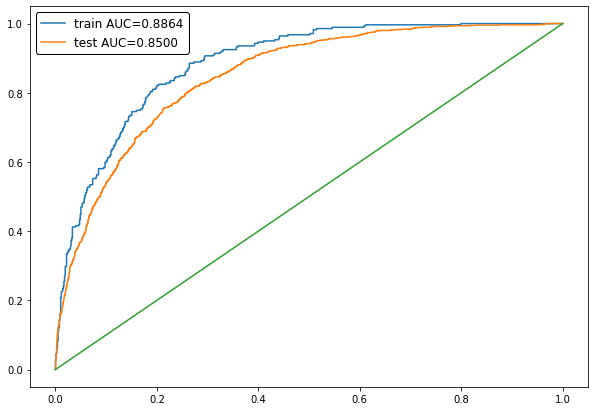

In [195]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [228]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = X_test['TotalSpent'].replace(to_replace=' ', value=0).astype(float)

In [229]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = catboost.predict_proba(X_test[feature_cols])[:, 1]
submission.to_csv('./cat_boost_simple.csv', index=False)

In [230]:
### Kaggle score: 0.84142
### Team: Vlad_Kremenevskiy

### Найдем лучшие параметры для CatBoost

In [207]:
boosting_model = CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
param_grid = {
    'l2_leaf_reg': np.linspace(0, 1, 20),
    'depth': list(range(1, 11)),
    'learning_rate': [0.005, 0.001, 0.05, 0.03, 0.01, 0.05]
}
boosting_model.randomized_search(param_grid, data[feature_cols], data[target_col], cv=5, n_iter=100, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8700251251
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8700251	best: 0.8700251 (0)	total: 470ms	remaining: 46.5s

bestTest = 0.8642358325
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8642358	best: 0.8700251 (0)	total: 845ms	remaining: 41.4s

bestTest = 0.8742357369
bestIteration = 197

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8742357	best: 0.8742357 (2)	total: 1.31s	remaining: 42.4s

bestTest = 0.7795936987
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.7795937	best: 0.8742357 (2)	total: 1.66s	remaining: 39.9s

bes


bestTest = 0.8731992052
bestIteration = 81

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8731992	best: 0.8745605 (20)	total: 18.4s	remaining: 35.8s

bestTest = 0.8716276893
bestIteration = 190

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8716277	best: 0.8745605 (20)	total: 19.2s	remaining: 35.6s

bestTest = 0.8669107532
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8669108	best: 0.8745605 (20)	total: 20s	remaining: 35.5s

bestTest = 0.856564542
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8565645	best: 0.8745605 (20)	total: 20.8s	remaining: 35.4s




bestTest = 0.8674624556
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8674625	best: 0.8745605 (20)	total: 59.9s	remaining: 29.5s

bestTest = 0.8676559097
bestIteration = 197

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8676559	best: 0.8745605 (20)	total: 1m 2s	remaining: 29.2s

bestTest = 0.8689694868
bestIteration = 65

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8689695	best: 0.8745605 (20)	total: 1m 4s	remaining: 29s

bestTest = 0.8665572815
bestIteration = 65

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8665573	best: 0.8745605 (20)	total: 1m 6s	remaining: 28.6s



bestTest = 0.8685730253
bestIteration = 74

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
99:	loss: 0.8685730	best: 0.8745605 (20)	total: 2m 44s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 0.8349433899
bestIteration = 199

Training on fold [1/3]

bestTest = 0.8477003001
bestIteration = 186

Training on fold [2/3]

bestTest = 0.8605802227
bestIteration = 163



{'params': {'depth': 2,
  'learning_rate': 0.05,
  'l2_leaf_reg': 0.7894736842105263},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
  

In [217]:
best_catboost_model = CatBoostClassifier(
    depth=2,
    iterations=200,
    eval_metric='AUC',
    l2_leaf_reg=0.7894736842,
    learning_rate=0.05,
    cat_features=cat_cols)
best_catboost_model.fit(data[feature_cols], data[target_col], verbose=False)

In [218]:
pred_train = best_catboost_model.predict_proba(data[feature_cols])[:, 1]
auc_score = roc_auc_score(data[target_col], pred_train)
print(f'auc score train: {auc_score}')

auc score train: 0.853681727253045


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [219]:
# Параметры модели, при которых достигнута наилучшая метрика:
# n_trees: 200
# depth: 2
# learning_rate: 0.05
# l2_leaf_reg: 0.7894736842
# score: 0.874

# Предсказания

In [220]:
best_model = best_catboost_model

In [226]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = X_test['TotalSpent'].replace(to_replace=' ', value=0).astype(float)

In [227]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test[feature_cols])[:, 1]
submission.to_csv('./cat_boost_tuned.csv', index=False)

In [72]:
### Kaggle score: 0.85117
### Team: Vlad_Kremenevskiy

### Try more

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
params_forest = {
    'max_depth': [2,3,4,5,6,7,8, 10, 15, 20, 25, 30, 40, 45, 50, 60, None],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2,3,4,5,10,15]
}

In [235]:
%%time
forest = RandomForestClassifier(n_estimators=100)
forest_grid = RandomizedSearchCV(forest, params_forest, n_iter=600, scoring='roc_auc', n_jobs=-1, refit=True, cv=5)
forest_grid.fit(train, data[target_col])

CPU times: user 6.57 s, sys: 749 ms, total: 7.32 s
Wall time: 12min 16s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=600,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10,
                                                      15, 20, 25, 30, 40, 45,
                                                      50, 60, None],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              15]},
                   scoring='roc_auc')

In [236]:
print(f'best forest score: {forest_grid.best_score_}')
forest_grid.best_params_

best forest score: 0.844085157678925


{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 0.2,
 'max_depth': 7}

In [237]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = forest_grid.best_estimator_.predict_proba(test)[:, 1]
submission.to_csv('./best_forest.csv', index=False)

In [ ]:
### Kaggle score: 0.85066
### Team: Vlad_Kremenevskiy

### Увеличим число деревьев и обучим с лучшими параметрами

In [240]:
best_forest = RandomForestClassifier(n_estimators=5000, min_samples_split=2,\
                                     min_samples_leaf=4, max_features=0.2, max_depth=7)
best_forest.fit(train, data[target_col])

RandomForestClassifier(max_depth=7, max_features=0.2, min_samples_leaf=4,
                       n_estimators=5000)

In [241]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_forest.predict_proba(test)[:, 1]
submission.to_csv('./best_forest_lots_trees.csv', index=False)

In [242]:
### Kaggle score: 0.85081
### Team: Vlad_Kremenevskiy

### Попробуем стейкинг моделей

In [246]:
# make average my logreg and not tuned_catboost
log_reg_csv = pd.read_csv('logreg_tuned.csv')
catboost_csv = pd.read_csv('cat_boost_simple.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (log_reg_csv['Churn'] + catboost_csv['Churn']) / 2
submission.to_csv('./logreg_simple_catboost', index=False)

In [76]:
### Kaggle score: 0.84768
### Team: Vlad_Kremenevskiy

In [247]:
# make average my logreg and tuned_catboost
log_reg_csv = pd.read_csv('logreg_tuned.csv')
catboost_csv = pd.read_csv('cat_boost_tuned.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (log_reg_csv['Churn'] + catboost_csv['Churn']) / 2
submission.to_csv('./logreg_tuned_catboost', index=False)

In [ ]:
### Kaggle score: 0.85005
### Team: Vlad_Kremenevskiy

In [249]:
# make average my random_forest and tuned_catboost
log_reg_csv = pd.read_csv('best_forest_lots_trees.csv')
catboost_csv = pd.read_csv('cat_boost_tuned.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (log_reg_csv['Churn'] + catboost_csv['Churn']) / 2
submission.to_csv('./rf_lots_trees_tuned_catboost', index=False)

In [ ]:
### Kaggle score: 0.85237
### Team: Vlad_Kremenevskiy

### Train harder boosting:

In [281]:
tunning_cat_boost = CatBoostClassifier(n_estimators=400, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
param_grid = {
    'subsample': np.linspace(0.5, 0.8, 10), 
    
    'l2_leaf_reg': np.linspace(1, 5, 10),
    
    'depth': list(range(1, 11)),
    'learning_rate': [0.01, 0.03, 0.05, 0.09, 0.1, 0.12, 0.13, 0.15],
    'min_data_in_leaf': [1,2,3,4,5,6,7,8,9,10]
}
tunning_cat_boost.randomized_search(param_grid, data[feature_cols], data[target_col], cv=5, n_iter=400, plot=True, refit=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8702735106
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8702735	best: 0.8702735 (0)	total: 4.76s	remaining: 31m 39s

bestTest = 0.8697027017
bestIteration = 36

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8697027	best: 0.8702735 (0)	total: 8.51s	remaining: 28m 14s

bestTest = 0.8628577706
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8628578	best: 0.8702735 (0)	total: 17.7s	remaining: 38m 57s

bestTest = 0.8674791738
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8674792	best: 0.8702735 (0)	total: 26.8s	remaining: 44m 9s

b


bestTest = 0.8722701479
bestIteration = 145

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8722701	best: 0.8737939 (7)	total: 1m 47s	remaining: 19m 14s

bestTest = 0.8724230005
bestIteration = 205

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8724230	best: 0.8737939 (7)	total: 1m 48s	remaining: 18m 55s

bestTest = 0.868563472
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8685635	best: 0.8737939 (7)	total: 1m 52s	remaining: 18m 55s

bestTest = 0.8674839505
bestIteration = 74

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8674840	best: 0.8737939 (7)	total: 2m 1s	remaining: 


bestTest = 0.8738822653
bestIteration = 248

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8738823	best: 0.8743790 (43)	total: 3m 46s	remaining: 18m 45s

bestTest = 0.8702352975
bestIteration = 56

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8702353	best: 0.8743790 (43)	total: 3m 48s	remaining: 18m 35s

bestTest = 0.8679592266
bestIteration = 23

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8679592	best: 0.8743790 (43)	total: 3m 51s	remaining: 18m 29s

bestTest = 0.8703093355
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8703093	best: 0.8743790 (43)	total: 3m 54s	remain


bestTest = 0.8748232642
bestIteration = 117

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
99:	loss: 0.8748233	best: 0.8748233 (99)	total: 5m 27s	remaining: 16m 22s

bestTest = 0.8729269365
bestIteration = 338

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
100:	loss: 0.8729269	best: 0.8748233 (99)	total: 5m 28s	remaining: 16m 12s

bestTest = 0.8732087585
bestIteration = 394

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
101:	loss: 0.8732088	best: 0.8748233 (99)	total: 5m 30s	remaining: 16m 5s

bestTest = 0.8710019489
bestIteration = 343

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
102:	loss: 0.8710019	best: 0.8748233 (99)	total: 5m 33s	r


bestTest = 0.867866082
bestIteration = 25

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
132:	loss: 0.8678661	best: 0.8760341 (106)	total: 6m 53s	remaining: 13m 49s

bestTest = 0.872819462
bestIteration = 68

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
133:	loss: 0.8728195	best: 0.8760341 (106)	total: 6m 54s	remaining: 13m 42s

bestTest = 0.8729938095
bestIteration = 84

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
134:	loss: 0.8729938	best: 0.8760341 (106)	total: 6m 56s	remaining: 13m 37s

bestTest = 0.8648520196
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
135:	loss: 0.8648520	best: 0.8760341 (106)	total: 7m 1s	re


bestTest = 0.8721602851
bestIteration = 243

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
165:	loss: 0.8721603	best: 0.8760341 (106)	total: 8m 30s	remaining: 11m 59s

bestTest = 0.8578709542
bestIteration = 20

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
166:	loss: 0.8578710	best: 0.8760341 (106)	total: 8m 39s	remaining: 12m 4s

bestTest = 0.8631085445
bestIteration = 31

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
167:	loss: 0.8631085	best: 0.8760341 (106)	total: 8m 48s	remaining: 12m 9s

bestTest = 0.871181073
bestIteration = 53

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
168:	loss: 0.8711811	best: 0.8760341 (106)	total: 8m 50s	r


bestTest = 0.8697743513
bestIteration = 33

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
198:	loss: 0.8697744	best: 0.8760341 (106)	total: 10m 37s	remaining: 10m 43s

bestTest = 0.8717471054
bestIteration = 125

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
199:	loss: 0.8717471	best: 0.8760341 (106)	total: 10m 39s	remaining: 10m 39s

bestTest = 0.8737938974
bestIteration = 117

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
200:	loss: 0.8737939	best: 0.8760341 (106)	total: 10m 40s	remaining: 10m 34s

bestTest = 0.8728266269
bestIteration = 213

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
201:	loss: 0.8728266	best: 0.8760341 (106)	total: 


bestTest = 0.8661226069
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
231:	loss: 0.8661226	best: 0.8760341 (106)	total: 12m 53s	remaining: 9m 20s

bestTest = 0.8735765601
bestIteration = 151

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
232:	loss: 0.8735766	best: 0.8760341 (106)	total: 12m 54s	remaining: 9m 15s

bestTest = 0.8719907142
bestIteration = 60

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
233:	loss: 0.8719907	best: 0.8760341 (106)	total: 12m 56s	remaining: 9m 11s

bestTest = 0.8731490504
bestIteration = 61

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
234:	loss: 0.8731491	best: 0.8760341 (106)	total: 13m	r


bestTest = 0.8724230005
bestIteration = 205

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
264:	loss: 0.8724230	best: 0.8760341 (106)	total: 15m	remaining: 7m 38s

bestTest = 0.8717017272
bestIteration = 61

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
265:	loss: 0.8717017	best: 0.8760341 (106)	total: 15m 3s	remaining: 7m 35s

bestTest = 0.8700824449
bestIteration = 38

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
266:	loss: 0.8700824	best: 0.8760341 (106)	total: 15m 6s	remaining: 7m 31s

bestTest = 0.8692489205
bestIteration = 220

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
267:	loss: 0.8692489	best: 0.8760341 (106)	total: 15m 11s	re


bestTest = 0.8696668768
bestIteration = 238

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
297:	loss: 0.8696669	best: 0.8760341 (106)	total: 17m 2s	remaining: 5m 50s

bestTest = 0.8742381253
bestIteration = 136

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
298:	loss: 0.8742381	best: 0.8760341 (106)	total: 17m 3s	remaining: 5m 45s

bestTest = 0.8721507318
bestIteration = 395

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
299:	loss: 0.8721507	best: 0.8760341 (106)	total: 17m 4s	remaining: 5m 41s

bestTest = 0.8718211433
bestIteration = 27

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
300:	loss: 0.8718211	best: 0.8760341 (106)	total: 17m 6s


bestTest = 0.8627073064
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
330:	loss: 0.8627073	best: 0.8760341 (106)	total: 19m 40s	remaining: 4m 6s

bestTest = 0.8722940311
bestIteration = 36

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
331:	loss: 0.8722940	best: 0.8760341 (106)	total: 19m 41s	remaining: 4m 2s

bestTest = 0.8696191104
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
332:	loss: 0.8696191	best: 0.8760341 (106)	total: 19m 48s	remaining: 3m 59s

bestTest = 0.8633043869
bestIteration = 13

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
333:	loss: 0.8633044	best: 0.8760341 (106)	total: 19m 58s	


bestTest = 0.8686136268
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
363:	loss: 0.8686136	best: 0.8760341 (106)	total: 22m 35s	remaining: 2m 14s

bestTest = 0.8688930605
bestIteration = 115

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
364:	loss: 0.8688931	best: 0.8760341 (106)	total: 22m 44s	remaining: 2m 10s

bestTest = 0.8737413543
bestIteration = 112

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
365:	loss: 0.8737414	best: 0.8760341 (106)	total: 22m 45s	remaining: 2m 6s

bestTest = 0.8716324659
bestIteration = 24

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
366:	loss: 0.8716325	best: 0.8760341 (106)	total: 22m 4


bestTest = 0.871121365
bestIteration = 35

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
396:	loss: 0.8711214	best: 0.8760341 (106)	total: 27m 24s	remaining: 12.4s

bestTest = 0.870476518
bestIteration = 104

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
397:	loss: 0.8704765	best: 0.8760341 (106)	total: 27m 31s	remaining: 8.3s

bestTest = 0.8687378196
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
399:	loss: 0.8687378	best: 0.8760341 (106)	total: 29m 2s	remaining: 0us
Estimating final quality...
Training on fold [0/5]

bestTest = 0.8254096084
bestIteration = 394

Training on fold [1/5]

bestTest = 0.8539317782
bestIteration = 312

Training on fold [2/5]

bestTest = 0.8515828936
bestIteration = 295

Training

{'params': {'min_data_in_leaf': 3,
  'depth': 1,
  'subsample': 0.7666666666666667,
  'learning_rate': 0.12,
  'l2_leaf_reg': 2.333333333333333},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,


In [288]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = tunning_cat_boost.predict_proba(X_test[feature_cols])[:, 1]
submission.to_csv('./best_boosting_ever.csv', index=False)

In [ ]:
### Kaggle score: 0.85378
### Team: Vlad_Kremenevskiy

In [290]:
# make average my random_forest and best_catboost
forest_csv = pd.read_csv('best_forest_lots_trees.csv')
best_boost_csv = pd.read_csv('best_boosting_ever.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = (forest_csv['Churn'] + best_boost_csv['Churn']) / 2
submission.to_csv('./best_boost_forest', index=False)

In [ ]:
### Kaggle score: 0.85401
### Team: Vlad_Kremenevskiy
### Rank: 147

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.